### Modelling logic gates using neural networks

In [1]:
import dl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = [[0, 0], [1, 0], [0, 1], [1, 1]]
and_y = [[0], [0], [0], [1]]
or_y = [[0], [1], [1], [1]]
xor_y = [[0], [1], [1], [0]]
not_x = [[0], [1]]
not_y = [[1], [0]]
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 1, 100)

In [3]:
and_model = dl.Model([2, 2, 1], ['none', 'sigmoid', 'sigmoid'], 'CUSTOM', 1e-3, 1e-1)
and_model.comp('ce', dl.RMSprop(and_model.params(), 1e-1, 0.9, 0.9))
or_model = dl.Model([2, 2, 1], ['none', 'sigmoid', 'sigmoid'], 'CUSTOM', 1e-3, 1e-1)
or_model.comp('ce', dl.RMSprop(or_model.params(), 1e-1, 0.9, 0.9))
xor_model = dl.Model([2, 4, 1], ['none', 'sigmoid', 'sigmoid'], 'CUSTOM', 1e-3, 1e-1)
xor_model.comp('ce', dl.RMSprop(xor_model.params(), 1e-1, 0.9, 0.9))
not_model = dl.Model([1, 2, 1], ['none', 'sigmoid', 'sigmoid'], 'CUSTOM', 1e-3, 1e-1)
not_model.comp('ce', dl.RMSprop(not_model.params(), 1e-1, 0.9, 0.9))

In [4]:
def n_and(a, b):
    return and_model.forward([a, b])[0]

def n_or(a, b):
    return or_model.forward([a, b])[0]

def n_xor(a, b):
    return xor_model.forward([a, b])[0]

def n_not(a):
    return not_model.forward([a])[0]

In [5]:
def output():
    return [[np.array([[n_and(xi, yi) for xi in X] for yi in Y]), 
             np.array([[n_or(xi, yi) for xi in X] for yi in Y]),
             np.array([[n_xor(xi, yi) for xi in X] for yi in Y]), 
             np.array([[n_not(xi) for xi in X] for yi in Y])], 
            ['AND', 'OR', 'XOR', 'NOT']]

In [6]:
def oplot(fig, out):
    figure = fig
    for i in range(4):
        plt.subplot(4, 2, 2 * i + 1)
        plt.plot(out[i][0][0])
        plt.title(out[i][1] + ' error')
        plt.subplot(4, 2, 2 * i + 2)
        plt.plot(out[i][0][1])
        plt.title(out[i][1] + ' loss')

In [7]:
def cplot(fig):
    out = output()
    for i in range(4):
        ax = fig.add_subplot(220 + i + 1)
        plt.title(out[1][i])
        cpf = ax.contour(X, Y, out[0][i], levels=100)

### Contour plots before training

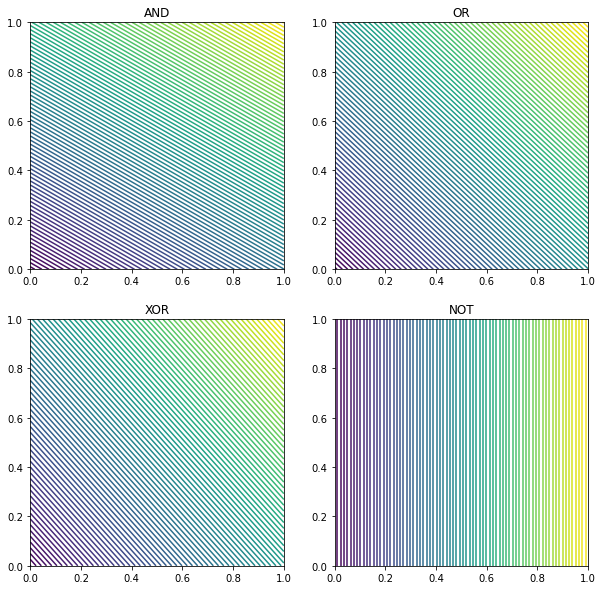

In [8]:
cplot(plt.figure(figsize=(10, 10)))

### Training

In [9]:
out = []
out.append([and_model.fit((x, and_y), epochs=250, batch_size=4)[1:], 'AND'])
out.append([or_model.fit((x, or_y), epochs=250, batch_size=4)[1:], 'OR'])
out.append([xor_model.fit((x, xor_y), epochs=250, batch_size=4)[1:], 'XOR'])
out.append([not_model.fit((not_x, not_y), epochs=250, batch_size=2)[1:], 'NOT'])

100%|██████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 1437.61it/s]


In [10]:
print('AND\n0 and 0 =', 0, '\n1 and 0 =', 0, '\n0 and 1 =', 0, '\n1 and 1 =', 1, '\n')
print('NN\n0 and 0 =', n_and(0, 0), '\n1 and 0 =', n_and(1, 0), '\n0 and 1 =', n_and(0, 1), '\n1 and 1 =', n_and(1, 1))

AND
0 and 0 = 0 
1 and 0 = 0 
0 and 1 = 0 
1 and 1 = 1 

NN
0 and 0 = 2.451311335647699e-05 
1 and 0 = 0.00030919494209872135 
0 and 1 = 0.00030919493582794985 
1 and 1 = 0.9988551143068954


In [11]:
print('OR\n0 or 0 =', 0, '\n1 or 0 =', 1, '\n0 or 1 =', 1, '\n1 or 1 =', 1, '\n')
print('NN\n0 or 0 =', n_or(0, 0), '\n1 or 0 =', n_or(1, 0), '\n0 or 1 =', n_or(0, 1), '\n1 or 1 =', n_and(1, 1))

OR
0 or 0 = 0 
1 or 0 = 1 
0 or 1 = 1 
1 or 1 = 1 

NN
0 or 0 = 0.0010330432623643475 
1 or 0 = 0.9997592414747234 
0 or 1 = 0.9997592877079922 
1 or 1 = 0.9988551143068954


In [12]:
print('XOR\n0 xor 0 =', 0, '\n1 xor 0 =', 1, '\n0 xor 1 =', 1, '\n1 xor 1 =', 0, '\n')
print('NN\n0 xor 0 =', n_xor(0, 0), '\n1 xor 0 =', n_xor(1, 0), '\n0 xor 1 =', n_xor(0, 1), '\n1 xor 1 =', n_xor(1, 1))

XOR
0 xor 0 = 0 
1 xor 0 = 1 
0 xor 1 = 1 
1 xor 1 = 0 

NN
0 xor 0 = 0.0019873935601738 
1 xor 0 = 0.997199173666619 
0 xor 1 = 0.999467877253294 
1 xor 1 = 0.0021510171566525437


In [13]:
print('NOT\nnot 1 =', 0, '\nnot 0 =', 1, '\n')
print('NN\nnot 1 =', n_not(1), '\nnot 0 =', n_not(0))

NOT
not 1 = 0 
not 0 = 1 

NN
not 1 = 0.00017787973544446578 
not 0 = 0.999822008878477


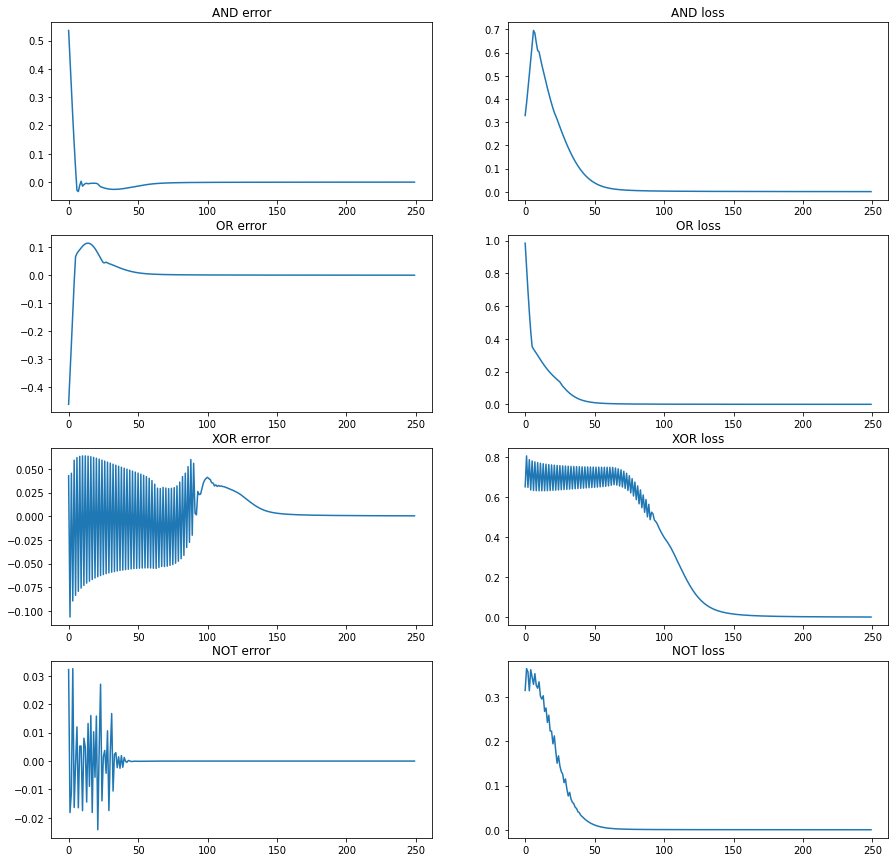

In [14]:
oplot(plt.figure(figsize=(15, 15)), out)

### Contour plots after training
After training, we can clearly see the boundaries! We see curved contours in XOR as it's not a linearly separable function.

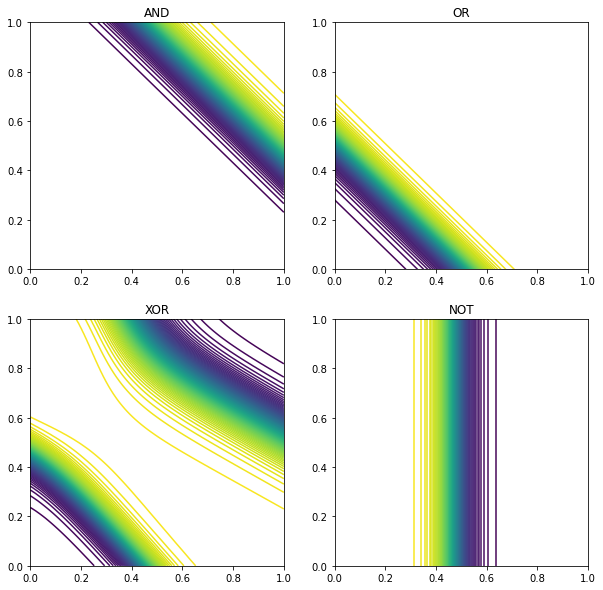

In [15]:
cplot(plt.figure(figsize=(10, 10)))